In [1]:
# Decision Tree Algorithm on Bitcoin transaction data
import pandas as pd
from collections import Counter
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate, KFold
from sklearn.metrics import average_precision_score,recall_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
import numpy as np
import matplotlib.pyplot as plt
from imblearn.under_sampling import NearMiss
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from sklearn.metrics import fbeta_score, make_scorer

# import io

# from google.colab import files

# uploaded = files.upload()
# #extract the data
# raw_df = pd.read_csv(io.BytesIO(uploaded['BitcoinHeistData.csv']))


#extract the data
raw_df = pd.read_csv("~/ML_class_projects/a_1/BitcoinHeistData.csv")
cleaned_df = raw_df.copy()

#clean the data
cleaned_df['class']=np.array([0 if x=='white' else 1 for x in cleaned_df.pop('label')])
cleaned_df.pop("address")
cleaned_df.pop("year")
cleaned_df.pop("day")
print(cleaned_df.head(5))


#summarize data distribution
y=np.array(cleaned_df['class'])
X=np.array(cleaned_df.iloc[:,:-1])
print(Counter(y))


#define the undersampling method
under = RandomUnderSampler(sampling_strategy=0.5)


   length    weight  count  looped  neighbors       income  class
0      18  0.008333      1       0          2  100050000.0      1
1      44  0.000244      1       0          1  100000000.0      1
2       0  1.000000      1       0          2  200000000.0      1
3      72  0.003906      1       0          2   71200000.0      1
4     144  0.072848    456       0          1  200000000.0      1
Counter({0: 2875284, 1: 41413})


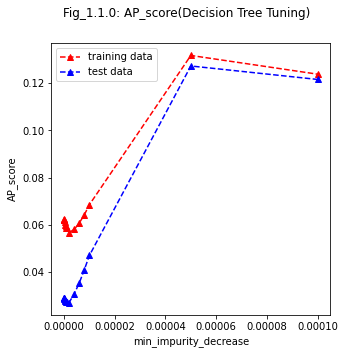

In [3]:
###########Cross-validation to find the best Min_impurity_decrease#################

t=7
cv = KFold(n_splits=t,shuffle=True)

recall_train_score_list=[]
recall_test_score_list=[]
AP_train_score_list=[]
AP_test_score_list=[]
fit_time_list=[]
Min_impurity_decrease=[0,0.000000002,0.000000005,0.00000001,0.0000001,0.0000002,0.0000004,0.0000006,0.0000008,0.000001,0.000002,0.000004,0.000006,0.000008,0.00001,0.00005,0.0001]

for min_impurity_decrease in Min_impurity_decrease:
    #define pipline
    clf = tree.DecisionTreeClassifier(min_impurity_decrease=min_impurity_decrease)
    steps = [('under',under),('model',clf)]
    pipeline = Pipeline(steps=steps)
    scores =  cross_validate(pipeline, X, y, scoring=['average_precision'], cv=cv, n_jobs=-1,return_train_score=True)
    
#     fit_time_list.append(sum(scores['fit_time'])/t)
#     recall_train_score_list.append(sum(scores['train_recall'])/t)
#     recall_test_score_list.append(sum(scores['test_recall'])/t)
    
    AP_train_score_list.append(sum(scores['train_average_precision'])/t)
    AP_test_score_list.append(sum(scores['test_average_precision'])/t)
    
m = len(Min_impurity_decrease)
#generate AP tunning graph#####
fig_0, axs = plt.subplots(1, 1, figsize=(5, 5), sharey=True)
axs.plot(Min_impurity_decrease[:m],AP_train_score_list[:m],"r^",linestyle = "--",label='training data')
axs.plot(Min_impurity_decrease[:m],AP_test_score_list[:m],"b^",linestyle = "--",label='test data')
axs.set_xlabel("min_impurity_decrease")
axs.set_ylabel("AP_score")
axs.legend()
fig_0.suptitle("Fig_1.1.0: AP_score(Decision Tree Tuning)")

fig_0.savefig("Decision_fig_1.0_tunning:AP_score for tunning.png")
# m = len(Min_impurity_decrease)
# # #generate Fig_1.1.0,Fig_1.1.1
# fig_0, axs = plt.subplots(1, 1, figsize=(5, 5), sharey=True)
# axs.plot(Min_impurity_decrease[:m],fit_time_list[:m],"r^",linestyle = "--",label="fit_time:seconds")
# axs.set_xlabel("Min_impurity_decrease")
# axs.set_ylabel("fit_time")
# axs.legend()
# fig_0.suptitle("Fig_1.1.0: Fit_time(Decision Tree Tuning)")

# fig_0.savefig("Decision_fig_1.0:Fit_time.png")



# fig_1, axs = plt.subplots(1, 2, figsize=(10, 5), sharey=True)
# axs[0].plot(Min_impurity_decrease[:m],recall_train_score_list[:m],"r^",linestyle = "--", label='training data')
# axs[0].plot(Min_impurity_decrease[:m],recall_test_score_list[:m],"b^",linestyle = "--",label='test data')
# axs[0].set_xlabel('Min_impurity_decrease')
# axs[0].set_ylabel('Recall_score')
# axs[1].plot(Min_impurity_decrease[:m],AP_train_score_list[:m],"r^",linestyle = "--",label='training data')
# axs[1].plot(Min_impurity_decrease[:m],AP_test_score_list[:m],"b^",linestyle = "--",label='test data')
# axs[1].set_xlabel('Min_impurity_decrease')
# axs[1].set_ylabel('AP_score')
# fig_1.suptitle('Fig_1.1.1:Recall_score,AP_score(Decision Tree Tuning)')

# axs[0].legend()
# axs[1].legend()
# fig_1.savefig("Decision_fig_1.1:Scores.png")

    
    


    

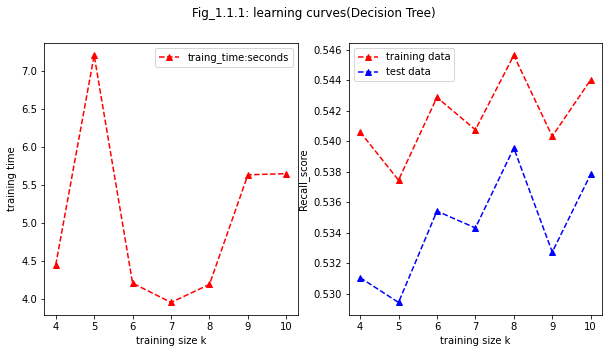

In [54]:
###############Apply the parameter min_impurity_decrease=1e-4 to train the model#############

Recall_train_score=[]
Recall_test_score=[]
training_time = []

for k in range(4,11):
    cv = KFold(n_splits=k,shuffle=True)
    clf = tree.DecisionTreeClassifier(min_impurity_decrease=1e-4)
    steps = [('under',under),('model',clf)]
    pipeline = Pipeline(steps=steps)
    scores =  cross_validate(pipeline, X, y, scoring=['recall'], cv=cv, n_jobs=-1,return_train_score=True)
    
    training_time.append(sum(scores['fit_time'])/k)
    Recall_train_score.append(sum(scores['train_recall'])/k)
    Recall_test_score.append(sum(scores['test_recall'])/k)

##genearte Fig_1.1.1 learning curves with traning size#######
K= range(4,11)
fig_1, axs = plt.subplots(1, 2, figsize=(10, 5), sharey=False)
axs[0].plot(K,training_time,"r^",linestyle = "--",label="traing_time:seconds")
axs[0].set_xlabel("training size k")
axs[0].set_ylabel("training time")
axs[1].plot(K,Recall_train_score,"r^",linestyle = "--",label='training data')
axs[1].plot(K,Recall_test_score,"b^",linestyle = "--",label='test data')
axs[1].set_xlabel("training size k")
axs[1].set_ylabel("Recall_score")
axs[0].legend()
axs[1].legend()
fig_1.suptitle("Fig_1.1.1: learning curves(Decision Tree)")

fig_1.savefig("Decision_fig_1.1_traninig:learning curves.png")

# ##generate Fig_1.1,2, Fig_1.1.3#########
# K= range(4,11)
# fig_2, axs = plt.subplots(1, 1, figsize=(5, 5), sharey=False)
# axs.plot(K,training_time,"r^",linestyle = "--",label="traing_time:seconds")
# axs.set_xlabel("training size k")
# axs.set_ylabel("training time")
# axs.legend()
# fig_2.suptitle("Fig_1.1.2:Training Time(min_impurity_decrease=5e-5)")
# fig_2.savefig("Decision_fig_1.2:training_time by training size.png")


# fig_3,axs =  plt.subplots(1, 2, figsize=(10, 5), sharey=True)
# axs[0].plot(K,Recall_train_score,"r^",linestyle = "--", label='training data')
# axs[0].plot(K,Recall_test_score,"b^",linestyle = "--",label='test data')
# axs[0].set_xlabel('Training Size k')
# axs[0].set_ylabel('Recall_score')
# axs[1].plot(K,AP_train_score,"r^",linestyle = "--",label='training data')
# axs[1].plot(K,AP_test_score,"b^",linestyle = "--",label='test data')
# axs[1].set_xlabel('Traning Size k')
# axs[1].set_ylabel('AP_score')
# fig_3.suptitle('Fig_1.1.3:Recall_score,AP_score((min_impurity_decrease=5e-5)')

# axs[0].legend()
# axs[1].legend()

# fig_3.savefig("Decision_fig_1.3:Scores by training size.png")



In [57]:
##Compare scores and tree_depth without and with prunning, generate data in table_1.0.0###########
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/8, random_state=123)
clf1 = tree.DecisionTreeClassifier()
clf2= tree.DecisionTreeClassifier(min_impurity_decrease=1e-4)
X_train_under,y_train_under = under.fit_resample(X_train,y_train)
clf1.fit(X_train_under,y_train_under)
clf2.fit(X_train_under,y_train_under)
print("decision_tree depth without and with prunning is:", clf1.get_depth(),clf2.get_depth())
print("recall_score on training data for decision_tree without and with prunning are:",recall_score(y_train,clf1.predict(X_train)),recall_score(y_train,clf2.predict(X_train)))
print("AP_score on training data using decision_tree without and with prunning are:",average_precision_score(y_train,clf1.predict_proba(X_train)[:,1]),average_precision_score(y_train,clf2.predict_proba(X_train)[:,1]))
print("recall_score on test data using decision_tree without and with prunning are:",recall_score(y_test,clf1.predict(X_test)),recall_score(y_test,clf2.predict(X_test)))
print("AP_score on test data using decision_tree without and with prunning are:",average_precision_score(y_test,clf1.predict_proba(X_test)[:,1]),average_precision_score(y_test,clf2.predict_proba(X_test)[:,1]))


decision_tree depth without and with prunning is: 61 20
recall_score on training data for decision_tree without and with prunning are: 0.9619879816968961 0.5284194277523568
AP_score on training data using decision_tree without and with prunning are: 0.06218602562019629 0.12500106939324404
recall_score on test data using decision_tree without and with prunning are: 0.6146056475170399 0.523271665043817
AP_score on test data using decision_tree without and with prunning are: 0.02876296787711337 0.12197721213637408


In [ ]:
##################plot the precision_recall_curve Fig_1.1.1 to find a good threhold for recall################
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
clf= tree.DecisionTreeClassifier(min_impurity_decrease=1e-4)
X_train_under,y_train_under = under.fit_resample(X_train,y_train)
clf.fit(X_train_under,y_train_under)
precision_1, recall_1, thresholds_1 = precision_recall_curve(y, clf.predict_proba(X)[:,1])
y_0=[0 if i==1 else 1 for i in y]
precision_0, recall_0, thresholds_0 = precision_recall_curve(y_0, clf.predict_proba(X)[:,0])
fig_1, axs = plt.subplots(1, 2, figsize=(5, 5), sharey=False)
axs[0].plot(recall_1,precision_1,"r",linestyle = "--",label='class 1')
axs[1].plot(recall_0,precision_0,"b",linestyle = "--",label='class 0')
axs[0].legend()
axs[1].legend()
axs[0].set_xlabel("recall")
axs[0].set_ylabel("precision")
axs[1].set_xlabel("recall")
axs[1].set_ylabel("precision")
fig_1.suptitle("Fig_1.1.1: precision_recall curves")
fig_1.savefig("Decision_tree_fig_1.1: precison_recall_curves.png")
plot_precision_recall_curve(clf,X_test,y_test)
###########compute the thresholds at which the precision starts to fall in the curve########
np.argmax(precision_1)